In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from imclas.collections import CollectionManager

In [3]:
manager = CollectionManager()

In [4]:
manager.create_collection('stop sign', 200, 'stop signs')

Error on image stop signs40.jpg
The error was: E:\Work\opencv\sources\modules\imgproc\src\imgwarp.cpp:3229: error: (-215) ssize.area() > 0 in function cv::resize

Error on image stop signs100.jpg
The error was: E:\Work\opencv\sources\modules\imgproc\src\imgwarp.cpp:3229: error: (-215) ssize.area() > 0 in function cv::resize

Error on image stop signs140.jpg
The error was: E:\Work\opencv\sources\modules\imgproc\src\imgwarp.cpp:3229: error: (-215) ssize.area() > 0 in function cv::resize

Error on image stop signs21.jpg
The error was: E:\Work\opencv\sources\modules\imgproc\src\imgwarp.cpp:3229: error: (-215) ssize.area() > 0 in function cv::resize

Error on image stop signs160.jpg
The error was: E:\Work\opencv\sources\modules\imgproc\src\imgwarp.cpp:3229: error: (-215) ssize.area() > 0 in function cv::resize

Error on image stop signs180.jpg
The error was: E:\Work\opencv\sources\modules\imgproc\src\imgwarp.cpp:3229: error: (-215) ssize.area() > 0 in function cv::resize

Error on image sto

In [21]:
manager.remove_collection('stop signs')

Exception: Collection does not exist!

In [2]:
from imclas.data_acquisition import DAL

In [3]:
d = DAL()

In [4]:
d.get_tables_names()

[(u'sqlite_sequence',), (u'collections',), (u'collection_items',)]

In [4]:
len(d.get_items_in_collection('stop signs'))

164

In [306]:
d.execute_query('select * from collections')

deque([(1, u'no left turn signs'), (4, u'stop signs')])

In [5]:
from imclas.features import FeatureExtractor

In [6]:
fex = FeatureExtractor()

In [11]:
%time features = fex.extract_features_from_collection(d.get_items_in_collection('stop signs'))

Wall time: 3.7 s


In [8]:
len(features)

NameError: name 'features' is not defined

In [4]:
from sklearn.cluster import KMeans

In [298]:
import cPickle

In [301]:
?cPickle.dump

In [303]:
with open("C:\\Users\\darkg\\Desktop\\class.txt", "w") as f:
    cPickle.dump(classifier, f)

In [304]:
with open("C:\\Users\\darkg\\Desktop\\class.txt", "r") as f:
    clf = cPickle.load(f)

In [14]:
classifier = KMeans(n_jobs=-1, n_clusters=50)

In [15]:
classifier.fit(features)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=50, n_init=10,
    n_jobs=-1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [40]:
classifier.cluster_centers_

array([[  7.16452991,   5.47863248,  27.70726496, ...,  13.19444444,
         11.69871795,  23.24145299],
       [ 29.32251082,  47.37229437,  40.15151515, ...,   6.85930736,
          5.68831169,   8.25757576],
       [ 15.18675722,   4.55008489,   3.31578947, ...,   4.94736842,
          3.35993209,   4.18505942],
       ..., 
       [ 22.60869565,  11.07867495,   6.32919255, ...,   5.50931677,
          1.8447205 ,   3.47412008],
       [ 38.94469027,  55.91371681,  33.80088496, ...,  20.75442478,
         12.41150442,  18.96460177],
       [  3.91873589,   2.69525959,   1.7020316 , ...,   1.82392777,
          0.81715576,   9.87358916]])

In [2]:
import numpy as np

In [9]:
items1 = d.get_items_in_collection('no left turn signs')

In [10]:
items = d.get_items_in_collection('stop signs')

In [11]:
nr_of_bins = 50

In [22]:
stop_signs_features = fex.extract_features_from_collection(items)

In [23]:
left_turn_features = fex.extract_features_from_collection(items1)

In [15]:
len(left_turn_features)

22813

In [294]:
import collections

In [25]:
l = []
l.extend(stop_signs_features)
l.extend(left_turn_features)

In [26]:
len(l)

47919

In [20]:
kmeans_classifier = KMeans(n_jobs=-1, n_clusters=50)

In [21]:
kmeans_classifier.fit(l)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=50, n_init=10,
    n_jobs=-1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [7]:
from collections import deque

In [15]:
l = deque([2,3])

In [16]:
l.extend([4,4,5])

In [17]:
l

deque([2, 3, 4, 4, 5])

In [13]:
kmeans_classifier = KMeans(n_jobs=-1, n_clusters=2)

In [10]:
kmeans_classifier.fit([[1,2,3],[3,4,4]])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=-1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [58]:
import collections
nr_of_bins = 50
def extract_histograms_from_features(classifier, images):
    zrs = collections.deque()
    for image in images:
        image = fex.perform_sift(image)
        if image is not None:
            zr = classifier.predict(image)
            hist, bin_edges = np.histogram(zr, bins=nr_of_bins, density=True)
            zrs.append(hist)
    return zrs

In [45]:
this_img = fex.perform_sift(d.get_items_in_collection('stop signs')[0])
zr = kmeans_classifier.predict(this_img)

In [43]:
zr

array([ 2,  2,  2, 41,  2, 41])

In [1]:
kmeans_classifier

NameError: name 'kmeans_classifier' is not defined

In [38]:
kmeans_classifier.predict([left_turn_features[0]])[0]

29

In [59]:
stop_signs_hists = extract_histograms_from_features(kmeans_classifier, d.get_items_in_collection('stop signs'))
left_turn_hists = extract_histograms_from_features(kmeans_classifier, d.get_items_in_collection('no left turn signs'))

In [60]:
len(stop_signs_hists)

164

In [61]:
len(left_turn_hists)

154

In [74]:
l = list()
l.extend(stop_signs_hists)
l.extend(left_turn_hists)
X = l

In [76]:
X[0]

array([ 0.85470085,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.42735043])

In [67]:
labels = ['stop sign'] * len(stop_signs_hists)

In [68]:
labels.extend(['no left turns'] * len(left_turn_hists))

In [71]:
from sklearn.svm import SVC
clf = SVC()

In [77]:
clf.fit(X, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
img_path = "C:\\Users\\darkg\\Desktop\\hand_drawn.jpg"

In [78]:
test_hist = extract_histograms_from_features(kmeans_classifier, [d.get_items_in_collection('stop signs')[3]])

In [80]:
test_hist[0]

array([ 0.02298217,  0.00919287,  0.01838573,  0.02298217,  0.02298217,
        0.0137893 ,  0.0413679 ,  0.03217503,  0.03217503,  0.00919287,
        0.0275786 ,  0.0137893 ,  0.00919287,  0.03217503,  0.00459643,
        0.03217503,  0.00459643,  0.0275786 ,  0.0275786 ,  0.0137893 ,
        0.0137893 ,  0.02298217,  0.        ,  0.0137893 ,  0.0413679 ,
        0.0137893 ,  0.01838573,  0.0137893 ,  0.03217503,  0.00459643,
        0.0275786 ,  0.0275786 ,  0.0275786 ,  0.02298217,  0.00459643,
        0.0275786 ,  0.01838573,  0.00919287,  0.03677147,  0.03217503,
        0.02298217,  0.00919287,  0.03217503,  0.03217503,  0.03217503,
        0.00919287,  0.01838573,  0.0137893 ,  0.0137893 ,  0.00919287])

In [83]:
clf.predict([test_hist[0]])[0]

'stop sign'

In [85]:
other_test_hist = extract_histograms_from_features(kmeans_classifier, [img_path])

In [86]:
other_test_hist

deque([array([  4.12807348e-03,   3.26805817e-03,   1.63402909e-03,
                5.79650318e-02,   5.16009185e-04,   9.46016839e-04,
                1.46202602e-03,   1.46202602e-03,   1.80603215e-03,
                9.46016839e-04,   2.58004592e-04,   7.80893900e-02,
                2.83805052e-03,   4.67762326e-01,   3.26805817e-03,
                2.58004592e-04,   1.80603215e-03,   2.49404439e-03,
                2.86471099e-01,   6.88012247e-04,   1.63402909e-03,
                1.80603215e-03,   1.37602449e-03,   8.60015308e-05,
                1.84043276e-02,   1.80603215e-03,   2.75204899e-03,
                1.20402143e-03,   3.26805817e-03,   7.56813471e-03,
                1.72003062e-03,   1.62542893e-02,   1.89203368e-03,
                1.11801990e-03,   8.42815002e-03,   4.12807348e-03,
                4.98808879e-03,   3.44006123e-04,   6.02010716e-03,
                2.58004592e-03,   1.63402909e-03,   6.88012247e-04,
                1.63402909e-03,   1.20402143e-03

In [87]:
clf.predict([other_test_hist[0]])[0]

'stop sign'

In [288]:
zrs = collections.deque()
for coll in items:
    this_img = fex._perform_sift(coll)
    zr = classifier.predict(this_img)
    hist, bin_edges = np.histogram(zr, bins=nr_of_bins, density=True)
    zrs.append((hist, bin_edges))

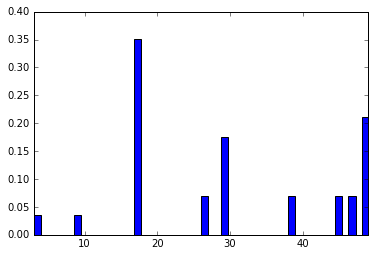

In [262]:
hist, bin_edges = zrs[0]
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()

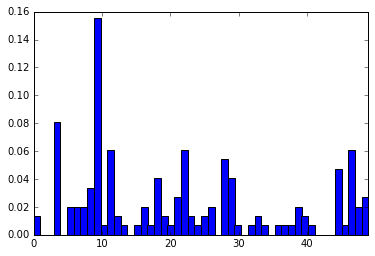

In [263]:
hist, bin_edges = zrs[1]
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()

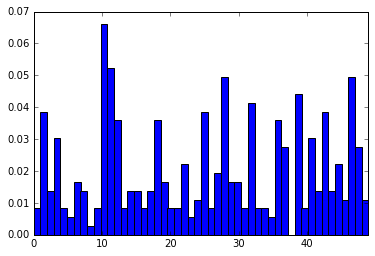

In [264]:
hist, bin_edges = zrs[6]
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()

In [266]:
from sklearn.svm import SVC

In [280]:
clf = SVC(probability=True) 
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array(['stop','stop','no turn','no turn'])
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [284]:
clf.predict([[-1,-1]])

array(['stop'], 
      dtype='|S7')

In [296]:
'~'.join(['stop signs', 'no turn left signs'])

'stop signs~no turn left signs'